# Verificador Entregas
 
1. Abrir carpetas de entrega AulaDigital
2. Convertir cuadernos a python con nbconvert
3. Comparar para similaridad

## Uso

Copiar este cuaderno en la raiz de la carpeta donde se descomprimió la entrega en Aula Digital, luego ejecutarlo todo.


In [1]:
%reset -sf

extensions = [
    '.py',
    'otra_ext'
]

evaluacion = "Examen 1"
enunciado = '''
Enunciado aquí.
'''

import os
from pathlib import Path

import tkinter as tk
from  tkinter import filedialog

root = tk.Tk()
root.withdraw()

''

## Procesar carpeta con archivos comprimidos o con carpetas descomprimidas

Requiere: 
- una carpeta con los .zip generados por Aula Digital
    - Con esta opción, descomprime los .zip y genera carpetas con consecutivos
o
- una carpeta con las subcarpetas de las evaluaciones.
    - Con esta opción, solo identifica las subcarpetas
    
El resultado es la lista ```basepaths```

In [2]:
rootpath = Path(filedialog.askdirectory())
# rootpath = Path(r"C:\Users\000092114\UPB\Fundamentos de Computacion 2022-20 - Profesores - Profesores\_notas\seg1\Test")
basepaths = []
content = rootpath.glob('*/')
contList = [Path(x) for x in content]
folders = [x for x in contList if x.is_dir()]
files = [x for x in contList if x.is_file() and x.suffix == ".zip"]
# print(folders)
# print(files)
# generateNB = False
if folders == [] and files != []: # si no se ha descomprimido nada y hay .zips por descomprimir
    from zipfile import ZipFile
    grupo = 1
    # ahora se define el nombre de la carpeta con un consecutivo.
    for file in files:
        # Create a ZipFile Object and load sample.zip in it
        with ZipFile(str(file), 'r') as zipObj:
           # Extract all the contents of zip file in different directory
            zipObj.extractall(file.parent/str(grupo))
#             generateNB = True
        basepaths.append(file.parent/str(grupo))
        grupo += 1
elif folders != []:
    basepaths = folders

In [3]:
print(rootpath)
print(basepaths)

C:\Users\LMAG\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496
[WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Agudelo Feriz Valentina_2771429_assignsubmission_file_'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Calao Jimenez Valentina_2771428_assignsubmission_file_'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Chacon Gallego David_2771431_assignsubmission_file_'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Gallego Alzate Daniel_2771433_assignsubmission_file_'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Madrid Rangel Juan Manuel_2771434_assignsubmission_file_'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2

## Procesar los archivos

Esta versión es solo para cuadernos de Jupyter.

In [4]:
pathList,nameList,nbList = list(),list(),list()
basepath = rootpath
# for basepath in basepaths:
for entry in os.listdir(basepath):
    entry = Path(entry)
    print(entry)
    if str(entry).endswith("_assignsubmission_file_"): # Descomentar para Tareas
#     if True:  # Descomentar para Cuestionarios
        #recoja todos los archivos de cada entrega
        pathList.append(basepath/entry)
        p = pathList[-1].glob("**/*")
        for i,x in enumerate(p):
            #solo guarde los que estén en la lista de extensiones (para evitar que coja los cuadernos)
            if x.is_file() and x.suffix == ".ipynb":
                #agregue el path de la carpeta a la lista de paths
                nbList.append(x)
                #agregue el nombre a la lista de nombres (extraido del nombre de la entrega)
                nameList.append(str(entry).split("_")[0])
#             nbList.append([x for x in p if x.is_file() and x.suffix == ".ipynb"])

Agudelo Feriz Valentina_2771429_assignsubmission_file_
Calao Jimenez Valentina_2771428_assignsubmission_file_
Chacon Gallego David_2771431_assignsubmission_file_
Gallego Alzate Daniel_2771433_assignsubmission_file_
Madrid Rangel Juan Manuel_2771434_assignsubmission_file_
mapaSimilaridad.pdf
Ortega Castaño Sebastian_2771421_assignsubmission_file_
Ospina Jaramillo Pablo_2771435_assignsubmission_file_
Perez De Los Rios Leonardo_2771422_assignsubmission_file_
Regalado Chicaiza Sebastian Mauricio_2771425_assignsubmission_file_
Rincon Gutierrez Daniel_2771420_assignsubmission_file_
Romero Castillo Sara Catalina_2771419_assignsubmission_file_
Sierra Guerrero Jose Francisco_2771437_assignsubmission_file_
Silva Rios Valeria_2771427_assignsubmission_file_
Tamayo Agudelo David_2771426_assignsubmission_file_
Vanegas Diaz Sofia_2771423_assignsubmission_file_
Vega Rodriguez Santiago_2771436_assignsubmission_file_
White Restrepo Tomas_2771418_assignsubmission_file_
Zuluaga Aristizabal Andres_2771430_

In [5]:
print(nbList,nameList,len(nbList),len(nameList))
    # leer el contenido del archivo como texto
    #print(scriptList[-1][-1].read_text())

[WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Agudelo Feriz Valentina_2771429_assignsubmission_file_/VAF 000431737 MECANISMO.ipynb'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Calao Jimenez Valentina_2771428_assignsubmission_file_/4 - Ecuaciones de cierre vectorial - Valentina Calao Jiménez (1) (1).ipynb'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Chacon Gallego David_2771431_assignsubmission_file_/Taller ecuaciones cierre vectorial.ipynb'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Gallego Alzate Daniel_2771433_assignsubmission_file_/Taller 4 cierre vectorial .ipynb'), WindowsPath('C:/Users/LMAG/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Madrid Rangel Juan Manuel_2771434

## Creación de scripts a partir de cuadernos

In [27]:
from unidecode import unidecode

def remover_caracteres_esp(nomArchivo):
    '''
    reemplaza caracteres especiales por ascii, tanto del nombre como del interior. 
    Usar con cuidado.
    '''
    archivo =  open(nomArchivo,encoding="UTF-8")
    texto = archivo.read()
    texto = unidecode(texto)
    archivo.close()
    nomArchivo.unlink()
    nomArchivo = Path(remove_non_ascii(str(nomArchivo)))
    archivo = open(nomArchivo,'w',encoding="UTF-8")
    archivo.write(texto)
    archivo.close()
    return nomArchivo

def genScripts(nombres,cuadernos,limpiar):
    listaScripts = []
    for cuaderno in cuadernos:
        try:
#             print(cuaderno)
#                 codeText = script.read_text(encoding="utf8")
            nombre = cuaderno.parts[-2].split('_')[0]
            fullNombre = nombre + ".py"
            print(fullNombre)
            fullNombre = cuaderno.parent/fullNombre
            listaScripts.append(fullNombre)
            if not fullNombre.exists():
                cuaderno = remover_caracteres_esp(cuaderno)
                !jupyter nbconvert --to script "{cuaderno}" --output "{nombre}"
            else:
                if limpiar:
                    fullNombre.unlink()
        except:
            print(f"fallo conversion de cuaderno en {cuaderno}")
#             return None
        
    return listaScripts

In [28]:
# testPath = Path(r"C:\Users\LMAG\UPB\Mecanismos - General\2022_20\_notas\_old\Taller 4 Andréçs Zuluaga - copia.ipynb")
# testPath = remover_caracteres_esp(testPath)

In [50]:
scriptList = []
print(nbList[0].parts[-2].split('_')[0])
print(str(nbList[0]))

scriptPaths = genScripts(nameList,nbList,True)


Agudelo Feriz Valentina
C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Agudelo Feriz Valentina_2771429_assignsubmission_file_\VAF 000431737 MECANISMO.ipynb
Agudelo Feriz Valentina.py
Calao Jimenez Valentina.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Agudelo Feriz Valentina_2771429_assignsubmission_file_\VAF 000431737 MECANISMO.ipynb to script
[NbConvertApp] Writing 4109 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Agudelo Feriz Valentina_2771429_assignsubmission_file_\Agudelo Feriz Valentina.py


Chacon Gallego David.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Calao Jimenez Valentina_2771428_assignsubmission_file_\4 - Ecuaciones de cierre vectorial - Valentina Calao Jiménez (1) (1).ipynb to script
[NbConvertApp] Writing 3653 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Calao Jimenez Valentina_2771428_assignsubmission_file_\Calao Jimenez Valentina.py


Gallego Alzate Daniel.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Chacon Gallego David_2771431_assignsubmission_file_\Taller ecuaciones cierre vectorial.ipynb to script
[NbConvertApp] Writing 3377 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Chacon Gallego David_2771431_assignsubmission_file_\Chacon Gallego David.py


Madrid Rangel Juan Manuel.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Gallego Alzate Daniel_2771433_assignsubmission_file_\Taller 4 cierre vectorial .ipynb to script
[NbConvertApp] Writing 1548 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Gallego Alzate Daniel_2771433_assignsubmission_file_\Gallego Alzate Daniel.py


Ortega Castaño Sebastian.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Madrid Rangel Juan Manuel_2771434_assignsubmission_file_\tallerMecanismosJuan.ipynb to script
[NbConvertApp] Writing 2497 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Madrid Rangel Juan Manuel_2771434_assignsubmission_file_\Madrid Rangel Juan Manuel.py


Ospina Jaramillo Pablo.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Ortega Castaño Sebastian_2771421_assignsubmission_file_\Taller4_SebastianOrtega (2).ipynb to script
[NbConvertApp] Writing 3314 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Ortega Castaño Sebastian_2771421_assignsubmission_file_\Ortega Castaño Sebastian.py


Perez De Los Rios Leonardo.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Ospina Jaramillo Pablo_2771435_assignsubmission_file_\Taller Ecuaciones Cierre Vectorial Pablo Ospina.ipynb to script
[NbConvertApp] Writing 4930 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Ospina Jaramillo Pablo_2771435_assignsubmission_file_\Ospina Jaramillo Pablo.py


Regalado Chicaiza Sebastian Mauricio.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Perez De Los Rios Leonardo_2771422_assignsubmission_file_\TALLER 4 .ipynb to script
[NbConvertApp] Writing 2869 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Perez De Los Rios Leonardo_2771422_assignsubmission_file_\Perez De Los Rios Leonardo.py


Rincon Gutierrez Daniel.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Regalado Chicaiza Sebastian Mauricio_2771425_assignsubmission_file_\Ecuaciones cierre vectorial.ipynb to script
[NbConvertApp] Writing 6136 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Regalado Chicaiza Sebastian Mauricio_2771425_assignsubmission_file_\Regalado Chicaiza Sebastian Mauricio.py


Sierra Guerrero Jose Francisco.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Rincon Gutierrez Daniel_2771420_assignsubmission_file_\Taller Ecuaciones De Cierre DRG.ipynb to script
[NbConvertApp] Writing 3040 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Rincon Gutierrez Daniel_2771420_assignsubmission_file_\Rincon Gutierrez Daniel.py


Silva Rios Valeria.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Sierra Guerrero Jose Francisco_2771437_assignsubmission_file_\ECUACIONES DE CIERRE VECTORIAL (1).ipynb to script
[NbConvertApp] Writing 3098 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Sierra Guerrero Jose Francisco_2771437_assignsubmission_file_\Sierra Guerrero Jose Francisco.py


Tamayo Agudelo David.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Silva Rios Valeria_2771427_assignsubmission_file_\Taller4EcuacionesCierre_ValeriaSilva.ipynb to script
[NbConvertApp] Writing 2666 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Silva Rios Valeria_2771427_assignsubmission_file_\Silva Rios Valeria.py


Vanegas Diaz Sofia.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Tamayo Agudelo David_2771426_assignsubmission_file_\04_taller_David.ipynb to script
[NbConvertApp] Writing 6279 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Tamayo Agudelo David_2771426_assignsubmission_file_\Tamayo Agudelo David.py


Vega Rodriguez Santiago.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Vanegas Diaz Sofia_2771423_assignsubmission_file_\Taller 4-SVD.ipynb to script
[NbConvertApp] Writing 2606 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Vanegas Diaz Sofia_2771423_assignsubmission_file_\Vanegas Diaz Sofia.py


White Restrepo Tomas.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Vega Rodriguez Santiago_2771436_assignsubmission_file_\Taller_Cierre_Vectorial_SVR.ipynb to script
[NbConvertApp] Writing 3595 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Vega Rodriguez Santiago_2771436_assignsubmission_file_\Vega Rodriguez Santiago.py


Zuluaga Aristizabal Andres.py


[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\White Restrepo Tomas_2771418_assignsubmission_file_\Taller 4 - Mecanismos - Tomas White.ipynb to script
[NbConvertApp] Writing 2943 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\White Restrepo Tomas_2771418_assignsubmission_file_\White Restrepo Tomas.py
[NbConvertApp] Converting notebook C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Zuluaga Aristizabal Andres_2771430_assignsubmission_file_\Taller 4 Andrés Zuluaga.ipynb to script
[NbConvertApp] Writing 2869 bytes to C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Taller Ecuaciones de cierre vectorial-866496\Zuluaga Aristizabal Andres_2771430_assignsubmission_file_\Zuluaga Aristizabal Andres.py


In [68]:
!jupyter nbconvert --to script "C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Zuluaga Aristizabal Andres_2771430_assignsubmission_file_/Zuluaga Aristizabal Andres.py"
print(scriptPaths)

[WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Agudelo Feriz Valentina_2771429_assignsubmission_file_/Agudelo Feriz Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Calao Jimenez Valentina_2771428_assignsubmission_file_/Calao Jimenez Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Chacon Gallego David_2771431_assignsubmission_file_/Chacon Gallego David.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Gallego Alzate Daniel_2771433_assignsubmission_file_/Gallego Alzate Daniel.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Madrid Rangel Juan Manuel_2771434_assignsubmission_file_/Madrid Rangel Juan Manuel.p

[NbConvertApp] Converting notebook C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Zuluaga Aristizabal Andres_2771430_assignsubmission_file_/Zuluaga Aristizabal Andres.py to script
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbformat\reader.py", line 18, in parse_json
    nb_dict = json.loads(s, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\json\__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "C:\ProgramData\Anaconda3\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "C:\ProgramData\Anaconda3\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\ProgramData\Anac

### Limpiar códigos de comentarios.

 

In [52]:
import re


def stripComments(code):
    code = str(code)
    return re.sub(r'(?m)^ *#.*\n?', '', code)
def stripLines(code,lines):
    return ''.join(code.splitlines())[lines:]

for i,script_base in enumerate(scriptPaths):
    archivo = open(script_base, errors='ignore',encoding='UTF-8')
    codigo = archivo.read()
    archivo.close()
    archivo = open(script_base,'w',encoding='UTF-8')
    codigo = stripComments(codigo)
    archivo.write(codigo)

In [53]:
print(nameList,scriptPaths)

print(len(nameList),len(scriptPaths))

['Agudelo Feriz Valentina', 'Calao Jimenez Valentina', 'Chacon Gallego David', 'Gallego Alzate Daniel', 'Madrid Rangel Juan Manuel', 'Ortega Castaño Sebastian', 'Ospina Jaramillo Pablo', 'Perez De Los Rios Leonardo', 'Regalado Chicaiza Sebastian Mauricio', 'Rincon Gutierrez Daniel', 'Sierra Guerrero Jose Francisco', 'Silva Rios Valeria', 'Tamayo Agudelo David', 'Vanegas Diaz Sofia', 'Vega Rodriguez Santiago', 'White Restrepo Tomas', 'Zuluaga Aristizabal Andres'] [WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Agudelo Feriz Valentina_2771429_assignsubmission_file_/Agudelo Feriz Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Calao Jimenez Valentina_2771428_assignsubmission_file_/Calao Jimenez Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Chacon Gall

### Verificar similaridad

Correr estas celdas individualmente.
1. Conformar la lista de scripts y estudiantes consolidada
2. correr la celda para generar el mapa de similaridad

In [54]:
# generar mapa de similaridad
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [66]:
try:
    print(umbral,'%')
    print(similarStdev,'%')
except:
    umbral = 90 #porcentaje de similitud

dimension = len(scriptPaths)
similarity = np.zeros((dimension,dimension))
mostSimilar = []
flatSimilar = []
for i,script_base in enumerate(scriptPaths):
    for j,script_cmp in enumerate(scriptPaths):
        with open(script_base, errors='ignore',encoding='UTF-8') as fileA,open(script_cmp, errors='ignore',encoding='UTF-8') as fileB:
            fileAData = fileA.read()
#             fileAData = stripComments(fileAData)
            fileBData = fileB.read()
#             fileBData = stripComments(fileBData)
            similarity[[i],[j]] = int(SequenceMatcher(None, fileAData,fileBData).ratio()*100)
            if similarity[[i],[j]]>umbral and j>i: #solo tomar a la derecha de la diagonal.
                mostSimilar.append([script_base,script_cmp,similarity[[i],[j]][0]])
                print( f"{script_base.parts[-2].split('_')[0]} se asemeja en: {similarity[i][j]:.0f} % a {script_cmp.parts[-2].split('_')[0]}.")
            if j>i:
                flatSimilar.append(similarity[[i],[j]][0])

similarStdev = statistics.stdev(flatSimilar)
similarMean = statistics.mean(flatSimilar)
umbral = int(similarMean+(similarStdev)*2)
df = pd.DataFrame(similarity, columns = nameList, index = nameList)

20 %
6.063839749321104 %
Chacon Gallego David se asemeja en: 23 % a Rincon Gutierrez Daniel.
Chacon Gallego David se asemeja en: 21 % a Sierra Guerrero Jose Francisco.
Chacon Gallego David se asemeja en: 21 % a Vanegas Diaz Sofia.
Chacon Gallego David se asemeja en: 21 % a White Restrepo Tomas.
Ospina Jaramillo Pablo se asemeja en: 21 % a Rincon Gutierrez Daniel.
Rincon Gutierrez Daniel se asemeja en: 21 % a Vanegas Diaz Sofia.


In [9]:
# percSimilar = dict((i,item) for i,item in enumerate(mostSimilar))
# print(percSimilar)    
# print(fileAData)

## Por hacer

Generar una lista de parejas de personas con similaridad mayor a cierto umbral, luego llamar al comparador con interfaz gráfica: https://github.com/yebrahim/pydiff

- Generar parejas de similares con mayor a umbral
- Verificar uso de la herramienta llamada desde cli.
- Sistematizar la revisión de comparación

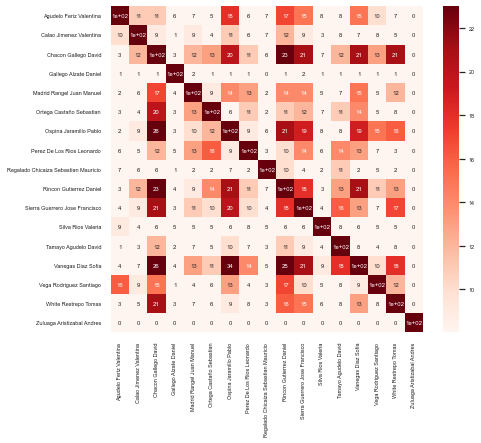

In [69]:
# print(df)
sns.set(font_scale=0.5)
sns.set_palette("coolwarm")
figure = plt.gcf() # get current figure
figure.set_size_inches(7, 6)
mapa = sns.heatmap(df, annot=True, vmin = similarMean, vmax = max(flatSimilar),cmap = "Reds")
plt.savefig(rootpath/'mapaSimilaridad.pdf', dpi=300,bbox_inches='tight')

### Crear un cuaderno con todos los códigos para comparación y verificación de fraudes

In [70]:
import subprocess

for similar in mostSimilar:
    path1 = str(similar[0])
    path2 = str(similar[1])
    command = f'python pydiff.py -p "{path1}" "{path2}"'
#     print(command)
    try:
        subprocess.call(command, timeout = 1, shell=True)
    except:
        pass
#   os.system(command)
# nb = nbf.v4.new_notebook()
# for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):
#     celdas = conformarCeldas(nb,estName,estScripts)
    
#     nb['cells'] += celdas
# nbf.write(nb, 'RevisionEntregas.ipynb')

### Refs

https://nbviewer.org/gist/fperez/9716279

https://github.com/yebrahim/pydiff